In [2]:
import eda
import pandas as pd
from typing import Optional, Union, List
import matplotlib.pyplot as plt
import nltk

drug_review_dataset = "flxclxc/encoded_drug_reviews"
ratings_li = range(1,10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bgrav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df = eda.read_hf_dataset_columns(
    dataset_name=drug_review_dataset,
    columns=["review", "rating", "usefulCount", "review_length"],
    split='train'
)

eda.get_counts_of_characters(df)
df = eda.calculate_sentiment(df)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(df.head())

Dataset shape: (53471, 10)
Columns: ['review', 'rating', 'usefulCount', 'review_length', 'letter_count', 'symbol_count', 'neg', 'neu', 'pos', 'compound']
                                              review  rating  usefulCount  \
0  "I have BCC on my upper arm and SCC on upper l...     1.0           16   
1  "I tore my shoulder labrum and the pain can be...     8.0           40   
2             "Amitiza is the best if you have ibs!"    10.0            9   
3  "Viagra works in a strong, crude way with side...    10.0           82   
4  "I really wanted Wellbutrin to work. I was giv...     3.0           15   

   review_length  letter_count  symbol_count    neg    neu    pos  compound  
0             36           157             3  0.059  0.793  0.148    0.5530  
1             45           194             5  0.064  0.770  0.167    0.6549  
2              8            28             1  0.000  0.609  0.391    0.6696  
3            141           544            36  0.067  0.783  0.150    0.

## Counts of each rating

<BarContainer object of 9 artists>

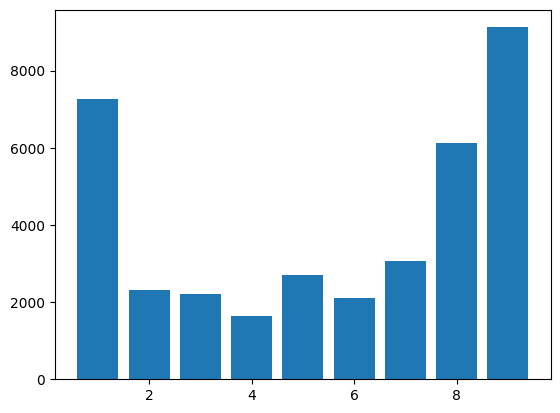

In [4]:
rating_counts = []
for rating in ratings_li:
    rating_counts.append(df[df["rating"] == float(rating)]["rating"].count())

plt.bar(ratings_li, rating_counts)

## Histograms of lengths and character counts

(array([5.290e+02, 7.300e+02, 8.740e+02, 9.610e+02, 1.001e+03, 9.600e+02,
        9.820e+02, 8.470e+02, 7.000e+02, 7.380e+02, 7.160e+02, 1.033e+03,
        1.272e+03, 4.000e+02, 2.100e+01, 3.000e+00, 1.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  12.16,  23.32,  34.48,  45.64,  56.8 ,  67.96,  79.12,
         90.28, 101.44, 112.6 , 123.76, 134.92, 146.08, 157.24, 168.4 ,
        179.56, 190.72, 201.88, 213.04, 224.2 , 235.36, 246.52, 257.68,
        268.84, 280.  , 291.16, 302.32, 313.48, 324.64, 335.8 , 346.96,
        358.12, 369.28, 380.44, 391.6 , 402.76, 413.92, 425.08, 436.24,
        447.4 , 

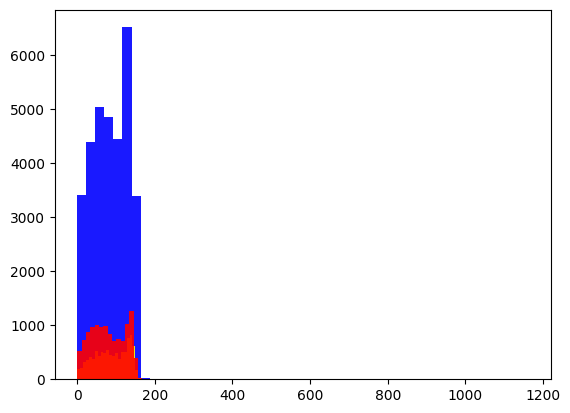

In [9]:
column_name="review_length"
plt.hist(df[df["rating"] >= 8][column_name], bins=50, label='high rate lengths', alpha=0.9, color='blue')
plt.hist(df[(df["rating"] > 3) & (df["rating"] < 8)][column_name], bins=50, label='mid rate lengths', alpha=0.9, color='yellow')
plt.hist(df[df["rating"] <= 3][column_name], bins=50, label='low rate lengths', alpha=0.9, color='red')

(array([4.240e+02, 7.040e+02, 8.390e+02, 1.001e+03, 1.002e+03, 9.500e+02,
        8.970e+02, 8.400e+02, 7.950e+02, 6.480e+02, 6.480e+02, 6.790e+02,
        1.730e+03, 6.030e+02, 7.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   3. ,   47.5,   92. ,  136.5,  181. ,  225.5,  270. ,  314.5,
         359. ,  403.5,  448. ,  492.5,  537. ,  581.5,  626. ,  670.5,
         715. ,  759.5,  804. ,  848.5,  893. ,  937.5,  982. , 1026.5,
        1071. , 1115.5, 1160. , 1204.5, 1249. , 1293.5, 1338. , 1382.5,
        1427. , 1471.5, 1516. , 1560.5, 1605. , 1649.5, 1694. , 1738.5,
        1783. , 

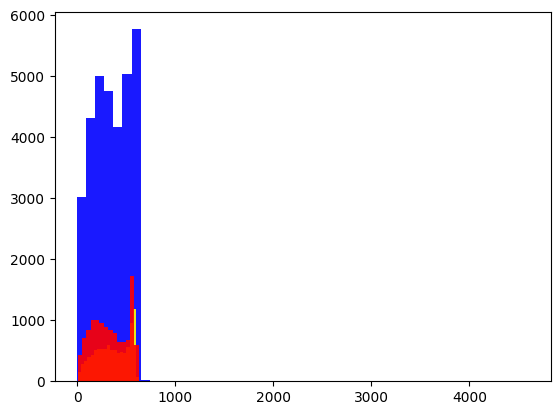

In [10]:
column_name="letter_count"
plt.hist(df[df["rating"] >= 8][column_name], bins=50, label='high rate letter_count', alpha=0.9, color='blue')
plt.hist(df[(df["rating"] > 3) & (df["rating"] < 8)][column_name], bins=50, label='mid rate letter_count', alpha=0.9, color='yellow')
plt.hist(df[df["rating"] <= 3][column_name], bins=50, label='low rate letter_count', alpha=0.9, color='red')

(array([4.840e+02, 9.560e+02, 1.231e+03, 1.232e+03, 6.550e+02, 1.203e+03,
        1.139e+03, 1.043e+03, 4.420e+02, 7.920e+02, 7.140e+02, 5.490e+02,
        2.210e+02, 3.590e+02, 2.760e+02, 1.670e+02, 6.100e+01, 9.800e+01,
        5.500e+01, 3.700e+01, 1.300e+01, 1.100e+01, 1.200e+01, 1.000e+01,
        5.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.  ,  1.76,  3.52,  5.28,  7.04,  8.8 , 10.56, 12.32, 14.08,
        15.84, 17.6 , 19.36, 21.12, 22.88, 24.64, 26.4 , 28.16, 29.92,
        31.68, 33.44, 35.2 , 36.96, 38.72, 40.48, 42.24, 44.  , 45.76,
        47.52, 49.28, 51.04, 52.8 , 54.56, 56.32, 58.08, 59.84, 61.6 ,
        63.36, 65.12, 66.88, 68.64, 70.4 , 72.16, 73.92, 75.68, 77.44,
        79.2 , 80.96,

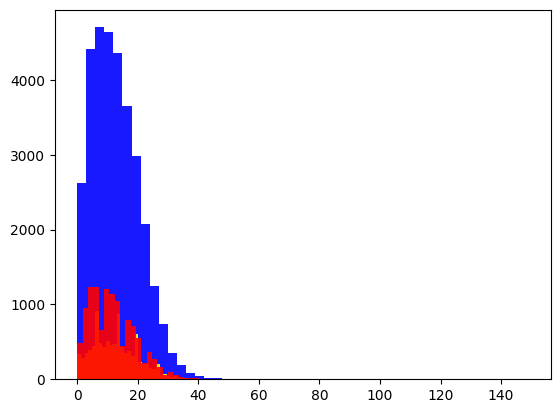

In [12]:
column_name="symbol_count"
plt.hist(df[df["rating"] >= 8][column_name], bins=50, label='high rate symbol_count', alpha=0.9, color='blue')
plt.hist(df[(df["rating"] > 3) & (df["rating"] < 8)][column_name], bins=50, label='mid rate symbol_count', alpha=0.9, color='yellow')
plt.hist(df[df["rating"] <= 3][column_name], bins=50, label='low rate symbol_count', alpha=0.9, color='red')

## Histograms of different Sentiment ratings

(array([2.562e+03, 6.590e+02, 1.090e+03, 1.109e+03, 1.162e+03, 1.080e+03,
        9.890e+02, 7.480e+02, 6.060e+02, 4.640e+02, 3.290e+02, 2.750e+02,
        2.220e+02, 1.360e+02, 9.200e+01, 5.800e+01, 4.300e+01, 3.800e+01,
        1.800e+01, 2.400e+01, 1.200e+01, 1.500e+01, 6.000e+00, 8.000e+00,
        4.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.     , 0.01372, 0.02744, 0.04116, 0.05488, 0.0686 , 0.08232,
        0.09604, 0.10976, 0.12348, 0.1372 , 0.15092, 0.16464, 0.17836,
        0.19208, 0.2058 , 0.21952, 0.23324, 0.24696, 0.26068, 0.2744 ,
        0.28812, 0.30184, 0.31556, 0.32928, 0.343  , 0.35672, 0.37044,
        0.38416, 0.39788, 0.4116 , 0.42532, 0.43904, 0.45276, 0.46648,
        0.4802 , 0.49

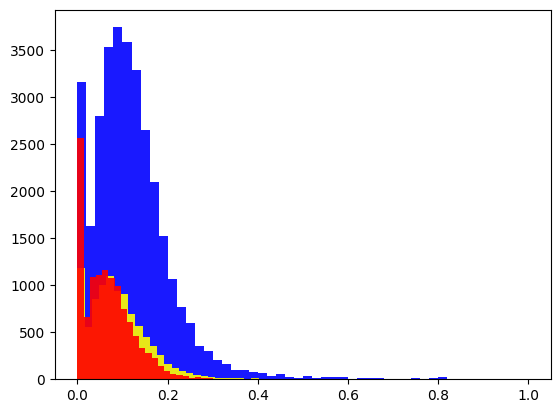

In [28]:
plt.hist(df[df["rating"] >= 8]["pos"], bins=50, label='pos', alpha=0.9, color='blue')
plt.hist(df[(df["rating"] > 3) & (df["rating"] < 8)]["pos"], bins=50, label='pos', alpha=0.9, color='yellow')
plt.hist(df[df["rating"] <= 3]["pos"], bins=50, label='pos', alpha=0.9, color='red')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 1.100e+01, 3.000e+00, 4.000e+00,
        1.000e+01, 1.100e+01, 1.300e+01, 1.000e+01, 1.800e+01, 2.300e+01,
        2.700e+01, 3.900e+01, 3.800e+01, 7.900e+01, 8.600e+01, 1.010e+02,
        1.640e+02, 2.380e+02, 3.190e+02, 4.340e+02, 5.400e+02, 6.030e+02,
        7.000e+02, 8.930e+02, 9.710e+02, 1.052e+03, 1.007e+03, 9.690e+02,
        8.620e+02, 7.320e+02, 5.220e+02, 4.200e+02, 2.510e+02, 1.370e+02,
        5.700e+01, 4.260e+02]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

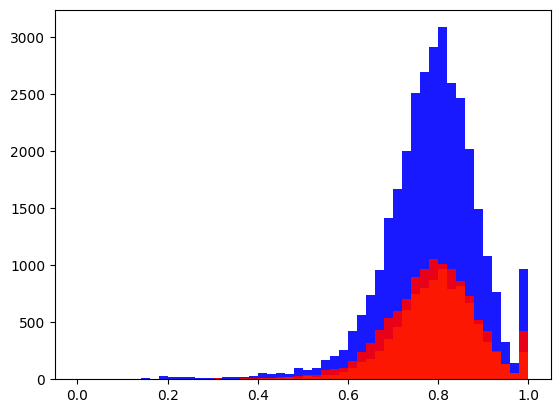

In [29]:
plt.hist(df[df["rating"] >= 8]["neu"], bins=50, label='neu', alpha=0.9, color='blue')
plt.hist(df[(df["rating"] > 3) & (df["rating"] < 8)]["neu"], bins=50, label='neu', alpha=0.9, color='yellow')
plt.hist(df[df["rating"] <= 3]["neu"], bins=50, label='neu', alpha=0.9, color='red')

(array([8.820e+02, 2.620e+02, 5.090e+02, 7.200e+02, 7.930e+02, 9.340e+02,
        9.850e+02, 1.055e+03, 9.720e+02, 8.380e+02, 7.610e+02, 6.270e+02,
        5.430e+02, 3.940e+02, 3.620e+02, 2.550e+02, 2.250e+02, 1.450e+02,
        1.080e+02, 7.700e+01, 6.500e+01, 4.900e+01, 3.400e+01, 3.900e+01,
        2.400e+01, 1.900e+01, 1.600e+01, 1.800e+01, 8.000e+00, 1.000e+01,
        6.000e+00, 1.100e+01, 3.000e+00, 4.000e+00, 3.000e+00, 8.000e+00,
        1.000e+00, 0.000e+00, 6.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.     , 0.01778, 0.03556, 0.05334, 0.07112, 0.0889 , 0.10668,
        0.12446, 0.14224, 0.16002, 0.1778 , 0.19558, 0.21336, 0.23114,
        0.24892, 0.2667 , 0.28448, 0.30226, 0.32004, 0.33782, 0.3556 ,
        0.37338, 0.39116, 0.40894, 0.42672, 0.4445 , 0.46228, 0.48006,
        0.49784, 0.51562, 0.5334 , 0.55118, 0.56896, 0.58674, 0.60452,
        0.6223 , 0.64

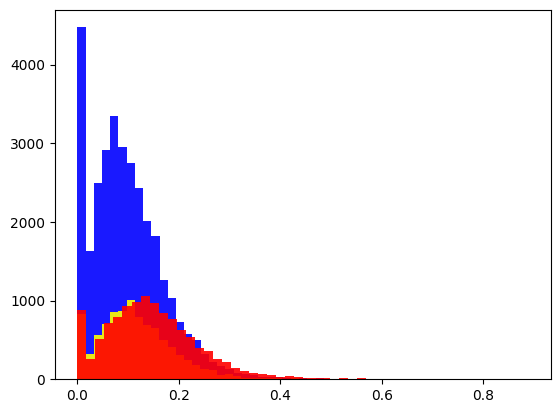

In [30]:
plt.hist(df[df["rating"] >= 8]["neg"], bins=50, label='neg', alpha=0.9, color='blue')
plt.hist(df[(df["rating"] > 3) & (df["rating"] < 8)]["neg"], bins=50, label='neg', alpha=0.9, color='yellow')
plt.hist(df[df["rating"] <= 3]["neg"], bins=50, label='neg', alpha=0.9, color='red')